In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
import pandas  as pd
from   keras.models import Sequential
from   keras.layers import Dense             # i.e.fully connected

In [3]:
df = pd.read_csv("training_labeled.csv", skipinitialspace = True, skiprows=1)

In [4]:
df.describe()

,Pozitie,Severitate def,Severitate inc.,Mod 1,Mod 2,Mod 3,Mod 4,Mod 5,Mod 6,Mod 7,Mod 8
count,36573.000000,36573.000000,36573.000000,36573.000000,36573.000000,36573.000000,36573.000000,36573.000000,36573.000000,36573.000000,36573.000000
mean,0.500000,0.019542,0.000716,0.005612,0.005612,0.005612,0.005612,0.005612,0.005612,0.005612,0.005612
std,0.289256,0.019646,0.000537,0.009464,0.007897,0.007627,0.007447,0.007350,0.007287,0.007243,0.007211
min,0.000000,0.000867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.003346,0.000413,0.000808,0.001030,0.001068,0.001090,0.001105,0.001114,0.001122,0.001127
50%,0.500000,0.012434,0.000567,0.001730,0.002211,0.002337,0.002409,0.002447,0.002468,0.002487,0.002499
75%,0.750000,0.032690,0.001020,0.005589,0.006648,0.006829,0.006903,0.006949,0.006971,0.007001,0.007005
max,1.000000,0.066210,0.001593,0.067803,0.067803,0.067803,0.067803,0.067803,0.067803,0.067803,0.067803


In [5]:
df.drop_duplicates(keep= 'first', inplace=True) #eliminarea dublurilor liniilor
print('Null values in dataset are',len(df[df.isnull().any(1)]))
df.shape

Null values in dataset are 0


(36573, 11)

In [6]:
df.sample(10)

,Pozitie,Severitate def,Severitate inc.,Mod 1,Mod 2,Mod 3,Mod 4,Mod 5,Mod 6,Mod 7,Mod 8
24676,0.254,0.007105,0.001020,0.004043,0.001180,0.003507,0.003666,0.001362,0.001753,0.004266,0.003805
23899,0.704,0.003346,0.001020,0.001079,0.001917,0.002939,0.001726,0.001119,0.002445,0.002236,0.001034
1847,0.688,0.003346,0.000000,0.000072,0.001012,0.001877,0.000416,0.000349,0.001643,0.000687,0.000131
20739,0.396,0.041025,0.000567,0.009483,0.014429,0.010364,0.004230,0.020986,0.001606,0.015415,0.012743
9419,0.802,0.005124,0.000413,0.000433,0.000863,0.002246,0.003314,0.002708,0.001073,0.000440,0.001550
12399,0.750,0.026224,0.000413,0.000661,0.004978,0.014178,0.012723,0.002546,0.002240,0.011501,0.011557
23716,0.338,0.003346,0.001020,0.001998,0.001657,0.002380,0.001081,0.001981,0.002510,0.001066,0.002038
18701,0.328,0.016030,0.000567,0.005486,0.003219,0.007325,0.001271,0.004045,0.008392,0.001624,0.003575
30154,0.188,0.001191,0.001593,0.002249,0.001611,0.001727,0.002043,0.002081,0.001808,0.001596,0.001736
36408,0.672,0.066210,0.001593,0.003304,0.023875,0.036914,0.005281,0.015363,0.033596,0.005917,0.014042


In [7]:
#train_data.info()

In [8]:
#features = ['Mod 1', 'Mod 2', 'Mod 3', 'Mod 4', 'Mod 5', 'Mod 6', 'Mod 7', 'Mod 8']

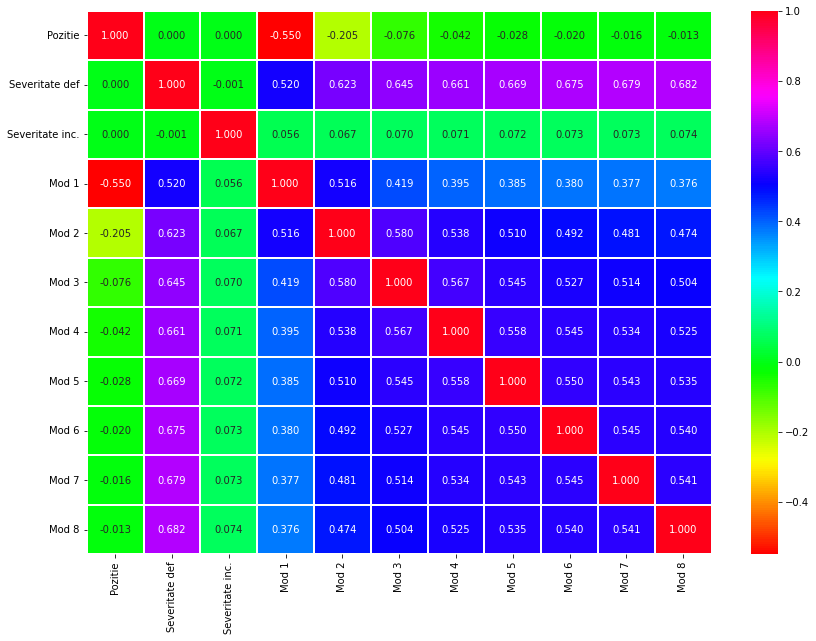

In [9]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [10]:
X = df.drop(['Pozitie', 'Severitate def', 'Severitate inc.'], axis = 1)
y = df[['Pozitie', 'Severitate def', 'Severitate inc.']].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

 # Keras Model

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

In [14]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer='uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 11, kernel_initializer='uniform', activation = 'relu'))

#Adding third hidden layer
classifier.add(Dense(units = 11, kernel_initializer='uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 3, kernel_initializer='uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
2926/2926 [==============================] - 36s 1ms/step - loss: 0.3252 - accuracy: 0.9771
Epoch 2/100
2926/2926 [==============================] - 4s 1ms/step - loss: 0.2155 - accuracy: 0.9772
Epoch 3/100
2926/2926 [==============================] - 4s 1ms/step - loss: 0.2125 - accuracy: 0.9798: 0s - loss: 0.2125 - accura
Epoch 4/100
2926/2926 [==============================] - 4s 1ms/step - loss: 0.2117 - accuracy: 0.9800
Epoch 5/100
2926/2926 [==============================] - 4s 1ms/step - loss: 0.2105 - accuracy: 0.9837
Epoch 6/100
2926/2926 [==============================] - 4s 1ms/step - loss: 0.2092 - accuracy: 0.9850
Epoch 7/100
2926/2926 [==============================] - 4s 1ms/step - loss: 0.2087 - accuracy: 0.9863
Epoch 8/100
2926/2926 [==============================] - 4s 1ms/step - loss: 0.2086 - accuracy: 0.9881
Epoch 9/100
2926/2926 [==============================] - 4s 1ms/step - loss: 0.2084 - accuracy: 0.9882
Epoch 10/100
2926/2926 [====================

In [ ]:
classifier.summary()

In [ ]:
dftest = pd.read_csv("training_labeled.csv", skipinitialspace = True, skiprows=1)

In [ ]:
atestdf = dftest.sample(2) #ia o valoare random din csv
expected = atestdf[['Pozitie', 'Severitate def', 'Severitate inc.']]
expected = expected.to_numpy()
atestdf = atestdf.drop(['Pozitie', 'Severitate def', 'Severitate inc.'], axis = 1)
atestdf = atestdf.to_numpy()

In [ ]:
#atest = array([[0.000861779, 0.000850052, 0.000839552, 0.000828849, 0.000818234, 0.000807687, 0.000797208, 0.000786798]]) adaugare valori de test manual

In [ ]:
ynew = classifier.predict(atestdf)
for iterator in range(len(atestdf)):
    print("Mod 1-8=%s, Predicted=%s" % (atestdf[iterator], ynew[iterator]))

In [ ]:
# for i in range(len(atestdf)): #sunt 3 deoarece prezice 3 valori Pozitie', 'Severitate def', 'Severitate inc.
#     for iterator in range(len(ynew[0])):
#         print("Diferenta dintre valorile predicted si expected este:")
#         print(ynew[i][iterator])
#         print(expected[i][iterator])
#     print("==========================================================")

In [ ]:
for i in range(len(atestdf)): #sunt 3 deoarece prezice 3 valori Pozitie', 'Severitate def', 'Severitate inc.
    for iterator in range(len(ynew[0])):
        print("Diferenta dintre valorile predicted si expected este:")
        print(abs(ynew[i][iterator] - expected[i][iterator]))
    print("==========================================================")

In [ ]:
def get_change(current, previous):
    if current == previous:
        return 0
    try:
        return (abs(current - previous) / current) * 100.0
    except ZeroDivisionError:
        return float('inf')

In [ ]:
for i in range(len(atestdf)): #sunt 3 deoarece prezice 3 valori Pozitie', 'Severitate def', 'Severitate inc.
    for iterator in range(len(ynew[0])):
        print("Diferenta in procente dintre valorile predicted si expected este:")
        print(get_change(ynew[i][iterator],expected[i][iterator]))
        #print((abs((float(ynew[i][iterator])-expected[i][iterator])/expected[i][iterator])*100))
    print("==========================================================")